# CAP 5768 - Data Science - Dr. Marques - Fall 2019

## Assignment 6: Regression Analysis
## Starter code

### Goals 

- To learn how to use perform linear regression by least squares using Python and scikit-learn.
- To appreciate that the same linear regression coefficients may be the best fit for dramatically different data distributions -- as illustrated by the Anscombe's quartet.
- To practice with different types of regularization (*lasso* and *ridge*) and understand when to use them.
- To expand upon the prior experience of manipulating, summarizing, and visualizing small datasets.
- To increase our statistical analysis skills.

### Instructions

- This assignment is structured in 4 parts.
- As usual, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will become your report.
- Submit the report (PDF), notebook (.ipynb file), and (optionally) link to the "live" version of your solution on Google Colaboratory via Canvas.
- The total number of points is 126 (plus up to 60 bonus points).

### Important

- It is OK to attempt the bonus points, but please **do not overdo it!** 

In [77]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns; sns.set()
import scipy.stats as ss

-------------------
## Part 1: Linear regression by least squares

In this part, we will take another look at the correlation between female literacy and fertility (defined as the average number of children born per woman) throughout the world. For ease of analysis and interpretation, we will work with the *illiteracy* rate.

The Python code below plots the fertility versus illiteracy and computes the Pearson correlation coefficient. The Numpy array `illiteracy` has the illiteracy rate among females for most of the world's nations. The array `fertility` has the corresponding fertility data.

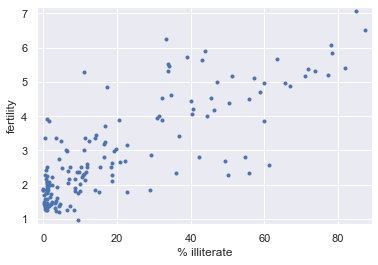

Pearson correlation coefficient between illiteracy and fertility: 0.80413


In [78]:
df = pd.read_csv('data/female_literacy_fertility.csv')

illiteracy = 100 - df['female literacy']

fertility = df['fertility']

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('% illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print('Pearson correlation coefficient between illiteracy and fertility: {:.5f}'.format(pearson_r(illiteracy, fertility)))

## Your turn! (25 points)

We will assume that fertility is a linear function of the female illiteracy rate: `f=ai+b`, where `a` is the slope and `b` is the intercept. 

We can think of the intercept as the minimal fertility rate, probably somewhere between one and two. 

The slope tells us how the fertility rate varies with illiteracy. 
We can find the best fit line .

Write code to plot the data and the best fit line (using `np.polyfit()`) and print out the slope and intercept.

## Solution

slope = 0.04979854809063423 children per woman / percent illiterate
intercept = 1.888050610636557 children per woman


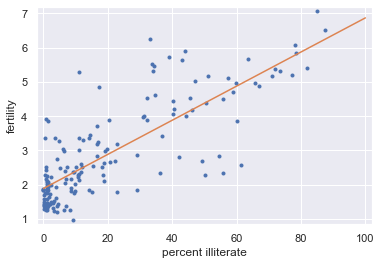

In [79]:
# Plot the illiteracy rate versus fertility
plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('percent illiterate')
plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

# Add regression line to your plot
plt.plot(x, y)

# Draw the plot
plt.show()

## BONUS! (15 points)

The function `np.polyfit()` that you used above to get your regression parameters finds the optimal slope and intercept. It is optimizing the the _residual sum of squares (RSS)_, also known as the _sum of squared residuals (SSR)_ or the _sum of squared estimate of errors (SSE)_, which can be defined as "the sum of the squares of residuals (deviations predicted from actual empirical values of data)." (see https://en.wikipedia.org/wiki/Residual_sum_of_squares)

Write code to plot the function that is being optimized, the RSS, versus the slope parameter `a`. To do this, fix the intercept (`b`) to be what you found in the optimization. Then, plot the RSS vs. the slope. Where is it minimal?

Hint: use a `for` loop to draw 100,000 permutation replicates and compute the Pearson correlation coefficient for each of them.

Your plot will probably look like this:
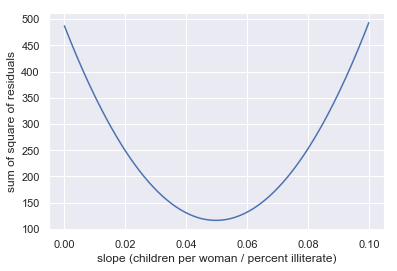

## Solution

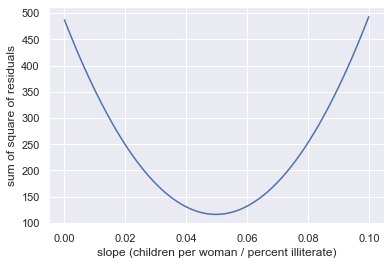

In [80]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0,0.1,200)
# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)
# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a * illiteracy - b)**2)
# Plot the RSS
plt.plot(a_vals,rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')
plt.show()

-------------------
## Part 2: Anscombe's quartet

The Anscombe's quartet is a collection of four small data sets that have nearly identical simple descriptive statistics, yet have very different distributions. Each dataset consists of 11 `(x,y)` points. The quartet was created in 1973 by the statistician Francis Anscombe to demonstrate: the importance of visualization and exploratory data analysis (EDA), the effect of outliers and other influential observations on statistical properties, and the limitations of summary statistics (\*).

(\*) See https://heap.io/blog/data-stories/anscombes-quartet-and-why-summary-statistics-dont-tell-the-whole-story if you're interested.

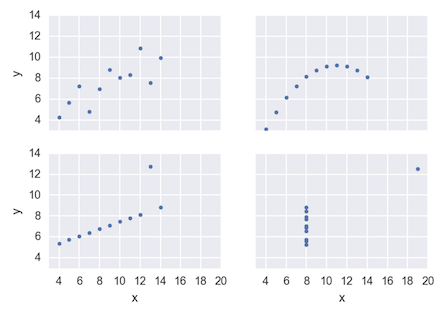 

The Python code below performs a linear regression on the data set from Anscombe's quartet that is most reasonably interpreted with linear regression.

In [81]:
x1 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y1 = [8.04, 6.95, 7.58,  8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

x2 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y2 = [9.14, 8.14, 8.74,  8.77, 9.26, 8.10, 6.13, 3.10, 9.13,  7.26, 4.74]

x3 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15,  6.42, 5.73]

x4 = [8.0,  8.0,  8.0,   8.0,  8.0,  8.0,  8.0,  19.0,  8.0,  8.0,  8.0]
y4 = [6.58, 5.76, 7.71,  8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

slope = 0.5000909090909095
intercept = 3.0000909090909076


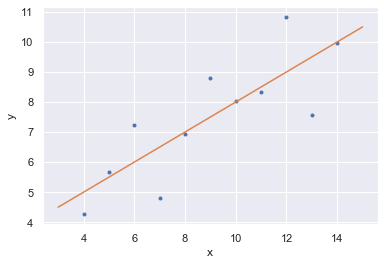

In [82]:
# Perform linear regression: a, b
a, b = np.polyfit(x1, y1, 1)

# Print the slope and intercept
print('slope =', a)
print('intercept =', b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x1, y1, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

## Your turn! (25 points)

### Linear regression on all Anscombe data

Write code to verify that all four of the Anscombe data sets have the same slope and intercept from a linear regression, i.e. compute the slope and intercept for each set. 

The data are stored in lists (`anscombe_x = [x1, x2, x3, x4]` and `anscombe_y = [y1, y2, y3, y4]`), corresponding to the $x$ and $y$ values for each Anscombe data set.

## Solution

In [83]:
anscombe_x = [x1, x2, x3, x4]
anscombe_y = [y1, y2, y3, y4]

# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x,y,1)
    # Print the result
    print('slope:', a, 'intercept:', b)

slope: 0.5000909090909095 intercept: 3.0000909090909076
slope: 0.5000000000000004 intercept: 3.000909090909089
slope: 0.4997272727272731 intercept: 3.0024545454545453
slope: 0.49990909090909064 intercept: 3.0017272727272735


-------------------
## Part 3: Regression using scikit-learn

Now that we know the basics of linear regression, we will switch to scikit-learn, a powerful, workflow-oriented library for data science and machine learning.

The Python code below shows a simple linear regression example using scikit-learn. Note the use of the `fit()` and `predict()` methods.

[2.9776566]
-1.903310725531119


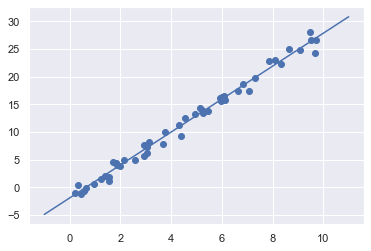

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data around the y = ax+b line where a=3 and b=-2
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 3 * x - 2 + rng.randn(50)

from sklearn.linear_model import LinearRegression

# Note: If you get a "ModuleNotFoundError: No module named 'sklearn'" error message, don't panic.
# It probably means you'll have to install the module by hand if you're using pip. 
# If you're using conda, you should not see any error message.

model = LinearRegression(fit_intercept=True)

X = x[:, np.newaxis]
X.shape

model.fit(X, y)
print(model.coef_)
print(model.intercept_)

xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

plt.scatter(x, y)
plt.plot(xfit, yfit);

## Polynomial regression

One way to adapt linear regression to nonlinear relationships between variables is to transform the data according to *basis functions*.

The idea is to take the multidimensional linear model:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$.
That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$
Notice that this is *still a linear model*—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other.
What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

The code below shows a simple example of polynomial regression using the ``PolynomialFeatures`` transformer in scikit-learn. Concretely, it shows how we can use polynomial features with a polynomial of degree seven, i.e. $$y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots + a_7 x^7$$ 

It also introduces the notion of a *pipeline* in scikit-learn. "The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters." (https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) 

The R^2 score for the fit is:  0.9806993128749466


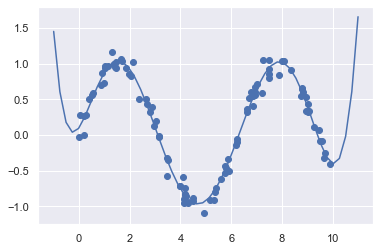

In [85]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

rng = np.random.RandomState(1)
x = 10 * rng.rand(100)
y = np.sin(x) + 0.1 * rng.randn(100)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);

print('The R^2 score for the fit is: ', poly_model.score(x[:, np.newaxis], y))

Our linear model, through the use of 7th-order polynomial basis functions, can provide an excellent fit to this non-linear data!

## Questions 1-3 (12 points, i.e. 4 pts each)

1. Which mathematical function was used to simulate the data points (with a bit of random noise around them)? 
2. Which degree/order was used for the polynomial basis functions?
3. How good was the linear model fit to the non-linear data?


## Solution

1. The mathematical functions used to simulate the data points with a bit of ramdom noise around them was the np.sin which generates this dataset and the RandomState.rand that gives you random values from a normal distribution.


2. The degree/order used for polynomials basis function was the 7th degree.


3. As you stated before, based on the dataset the polynomial basis function can provides an excellent fit to this non-lineal data.

## Your turn (18 points)

Write code to find the best degree/order for the polynomial basis functions (between 1 and 15) by computing the quality of the fit using a suitable metric, in this case the $R^2$ coefficient (which can be computer using the `score()` function). 

Remember that **the best possible score is 1.0**. The score can be negative (because the model can be arbitrarily worse). A score of 0 suggests a constant model that always predicts the expected value of y, disregarding the input features.

Hint: If you plot the score against the degree/order of the polynomial, you should see something like this:

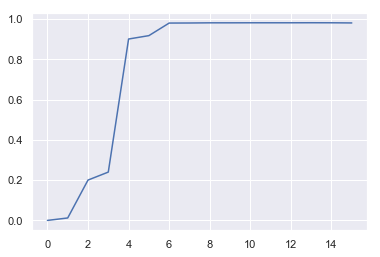

## Solution

In [86]:
def BiasedPolyDegree(poly_degree):
    poly_model = make_pipeline(PolynomialFeatures(poly_degree),
                               LinearRegression())

    rng = np.random.RandomState(1)
    x = 10 * rng.rand(100)
    y = np.sin(x) + 0.1 * rng.randn(100)
    poly_model.fit(x[:, np.newaxis], y)
    return poly_model.score(x[:, np.newaxis], y)


Highest polynomial 13


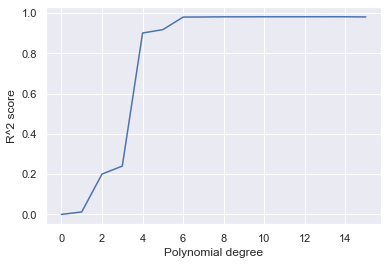

In [87]:
r_values = []
for degree in range(16):
    r_values.append(BiasedPolyDegree(degree))

plt.xlabel('Polynomial degree')
plt.ylabel('R^2 score')    
plt.plot(r_values)
print("Highest polynomial", r_values.index(max(r_values)))

## Questions 4-6 (12 points, i.e. 4 pts each)

4. Which degree/order polynomial produced the best fit (i.e., highest $R^2$ score)? 
5. Would you consider using the resulting polynomial as your model? Why (not)?
6. If you answered 'no' to question 5 (as you should!), which degree would you choose for your polynomial regression model?


## Solution

4. The order degree of the polynomial produced the best fit is polynomial 13 which was the highest R^2.


5. I don't think to consider this resulting polynomial as your model.


6. I don't use this model because it produce overfitting which could be not good if you use a new dataset. In addition, this polynomial degree makes the model very complex and it is not necesary at this point. A better way to resolved this model is use a regularization which will address the overfitting problem in High-order polynomails.

## Part 4: Regularization

The use of polynomial regression with high-order polynomials can very quickly lead to over-fitting. In this part, we will look into the use of regularization to address potential overfitting.

The code below shows an attempt to fit a 15th degree polynomial to a sinusoidal shaped data. The fit is excellent ($R^2$ > 0.98), but might raise suspicions that it will lead to overfitting.

0.9806993128749466


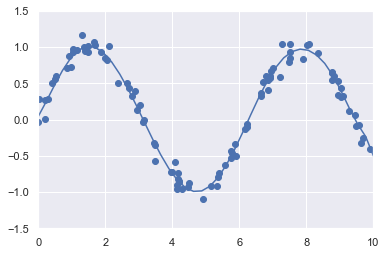

In [88]:
model = make_pipeline(PolynomialFeatures(15),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

score = poly_model.score(x[:, np.newaxis], y)
print(score)

## Your turn! (10 points)

Write Python code to perform Ridge regression ($L_2$ Regularization), plot the resulting fit, and compute the $R^2$ score.

Hints: 
1. This type of penalized model is built into Scikit-Learn with the ``Ridge`` estimator. 
2. In the beginning, use all default values for its parameters.
3. After you get your code to work, spend some time trying to fine-tune the model, i.e., experimenting with the regularization parameters.

## Solution

0.9806993128749466


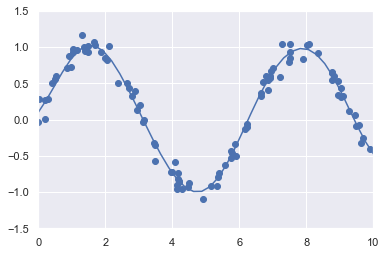

In [89]:
from sklearn.linear_model import Ridge
model = make_pipeline(PolynomialFeatures(15),
                      Ridge(alpha=.1,
                           tol=0.001,
                           solver='auto'))

model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

score = poly_model.score(x[:, np.newaxis], y)
print(score)

## Your turn! (10 points)

Write Python code to perform Lasso regression ($L_1$ Regularization), plot the resulting fit, and compute the $R^2$ score.

Hints: 
1. This type of penalized model is built into Scikit-Learn with the ``Lasso`` estimator. 
2. In the beginning, use `Lasso(alpha=0.1, tol=0.2)`
3. After you get your code to work, spend some time trying to fine-tune the model, i.e., experimenting with the regularization parameters.

## Solution

0.9806993128749466


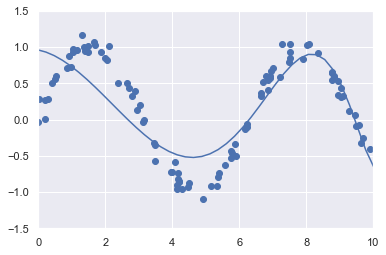

In [90]:
from sklearn.linear_model import Lasso

model = make_pipeline(PolynomialFeatures(15),
                      Lasso(alpha=0.01, tol=0.15,precompute=True))
# Lasso()
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

score = poly_model.score(x[:, np.newaxis], y)
print(score)

## Question 7 (4 points)

7. Which of the two regularization approaches produced a better fit (and was also the easiest to fine-tune)?


## Solution

In general, the Ridge regularization approach produced a better fit and it is also the easiest to fine-tune. In addition, the Ridge regularization approach was closer to the default values on the model. In other way, the Lasso approach was not close to the default values on the dataset and when you try to fine-tune has a significant impact on the graph.

## Bonus! (30 points)

The Boston housing dataset is a classic dataset used in linear regression examples.
(See https://scikit-learn.org/stable/datasets/index.html#boston-dataset for more)

The Python code below:
- Loads the Boston dataset (using scikit-learn's `load_boston()`) and converts it into a Pandas dataframe
- Selects two features to be used for fitting a model that will then be used to make predictions: LSTAT (% lower status of the population) and RM (average number of rooms per dwelling) (\*)
- Splits the data into train and test sets

(\*) See https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155 for details.

In [91]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [92]:
boston['MEDV'] = boston_dataset.target
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
y = boston['MEDV']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


Write Python code to:

1. Fit a linear model to the data.
2. Compute and print the RMSE and $R^2$ score for both train and test datasets.
3. Fit a polynomial model (of degree 4) to the data.
4. Compute and print the RMSE and $R^2$ score for both train and test datasets.
5. Apply Ridge regression to the polynomial model.
4. Compute and print the RMSE and $R^2$ score for both train and test datasets.

## Solution

In [93]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

def test_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    y_train_prediction = model.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(y_train, y_train_prediction)))
    r_2 = r2_score(y_train,y_train_prediction)
    print("\nTraining data")
    print("RMSE: ", rmse)
    print('R^2 score: ', r_2)   

    # Test data
    y_test_prediction = model.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(y_test, y_test_prediction)))
    r_2 = r2_score(y_test,y_test_prediction)

    print("\nPrediction Data")
    print("RMSE: ", rmse)
    print('R^2 score: ', r_2)

In [94]:
print("1. Fit a linear model to the data.")
print("2. Compute and print the RMSE and  𝑅2  score for both train and test datasets.")


model = LinearRegression(fit_intercept=True)
test_model(model, X_train, y_train, X_test, y_test)

1. Fit a linear model to the data.
2. Compute and print the RMSE and  𝑅2  score for both train and test datasets.

Training data
RMSE:  5.6371293350711955
R^2 score:  0.6300745149331701

Prediction Data
RMSE:  5.13740078470291
R^2 score:  0.6628996975186954


In [95]:
print("3. Fit a polynomial model (of degree 4) to the data")
print("4. Compute and print the RMSE and  𝑅2  score for both train and test datasets.")


poly_model = make_pipeline(PolynomialFeatures(4),
                           LinearRegression())
test_model(poly_model, X_train, y_train, X_test, y_test)

3. Fit a polynomial model (of degree 4) to the data
4. Compute and print the RMSE and  𝑅2  score for both train and test datasets.

Training data
RMSE:  4.276081212074226
R^2 score:  0.7871419186085676

Prediction Data
RMSE:  3.8885946020800866
R^2 score:  0.8068665116494962


In [96]:
print("5. Apply Ridge regression to the polynomial model.")
print("6. Compute and print the RMSE and  𝑅2  score for both train and test datasets.")

poly_ridge_model = make_pipeline(PolynomialFeatures(4),
                                 Ridge(alpha=.1,
                                       tol=0.001,
                                       solver='auto'))
test_model(poly_ridge_model, X_train, y_train, X_test, y_test)

5. Apply Ridge regression to the polynomial model.
6. Compute and print the RMSE and  𝑅2  score for both train and test datasets.

Training data
RMSE:  4.407971809063195
R^2 score:  0.773808713681434

Prediction Data
RMSE:  3.8921858701723906
R^2 score:  0.8065096143712593


## Conclusions (10 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

## Solution

1. I have learned how to use perform linear regression by least squares using Python and scikit-learn. In addition, I have learned that the same linear regression coefficients may be the best fit for dramatically different data distributions. Morover, I learned about approaches of regularization such as Lasso and Ridge and how to split dataset for training and testing data.


2. The part that I enjoyed most was linear regression by least squares. The most time consuming was the last bonus point where we use the Boston housing dataset and split the data in training and testing set to calculate the RMSE and  𝑅2  score for both train and test datasets in different situations. The most enlightening part the polynomial regression part. And the most tedious part was the bonus point where we write code to find the best degree/order for the polynomial basis functions (between 1 and 15) by computing the quality of the fit using a suitable metric.


3. If I would have an additional week to work in this assignment, I will add more details to all of the exercises on the assignment 6.